# Retrieving and loading the Dataset

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Visualise the dataset

In [3]:
import math

def visualise_data(X, y=None, predictions=None, figsize=(6, 6)):
    """
    Visualise up to 100 images from the dataset.
    Input:
        X: images (n, 28, 28)
        y: labels (j)
        predictions: predicted labels (j)
    """

    n, m, k = X.shape
    print(f"n = {n}, m = {m}, k = {k}")

    randomise = False
    if n > 100:
        randomise = True

    fig = plt.figure(figsize=figsize)

    rows = math.ceil(n / 10)
    for i in range(rows):
        if i == 10:
            break
        
        if i == rows - 1:
            cols = n % 10 if n % 10 != 0 else 10
        else:
            cols = 10

        for j in range(cols):
            ax = fig.add_subplot(10, 10, i * 10 + j + 1)
            ax.set_axis_off()

            index = i * 10 + j
            if randomise:
                index = np.random.randint(0, n)

            ax.imshow(X[index], cmap='gray')
            if predictions is not None:
                title = '{0}, {1}'.format(y[index], predictions[index])
                ax.set_title(title)
            elif y is not None:
                ax.set_title(y[index])
                
    fig.tight_layout(pad=0.1)
    # plt.show()

# visualise_data(X_train[:100], y_train[:100])

### Reshaping the dataset

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Build the model

In [5]:
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),    #specify input size
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(10, activation="linear"),
    ], name = "mnist_model"
)    

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [6]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### (Optional) Load existing model

In [7]:
model.load_weights("data/models/mnist_model.h5")

#### Train the model

In [8]:
tf.random.set_seed(1234)   # set random seed for reproducibility

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

# history = model.fit(
#     X_train, y_train,
#     epochs=10
# )

# Predictions

In [9]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3040


0.3039618134498596

In [9]:
predictions = model.predict(X_test)
# predictions = np.argmax(predictions, axis=1)
# pre

313/313 [==============================] - 1s 1ms/step


In [10]:
predictions_p = tf.nn.softmax(predictions)
predictions_p = np.argmax(predictions_p, axis=1)
predictions_p

array([7, 2, 1, ..., 4, 5, 6])

n = 100, m = 28, k = 28


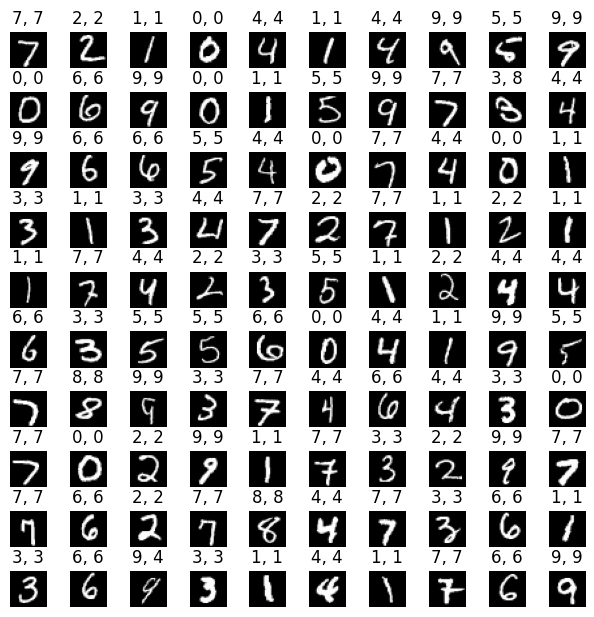

In [11]:
X = X_test[:100].reshape(100, 28, 28)
visualise_data(X, y_test[:100], predictions_p[:100])

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

def display_errors(model, X, y):
    f = model.predict(X)
    yhat = np.argmax(f, axis=1)
    idxs = np.where(yhat != y[:,0])[0]

    if len(idxs) == 0:
        print("no errors found")
    else:
        cnt = min(8, len(idxs))
        fig, ax = plt.subplots(1, cnt, figsize=(5,1.2))
        fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.80]) #[left, bottom, right, top]
        
        widgvis(fig)

        for i in range(cnt):
            j = idxs[i]
            X_reshaped = X[j].reshape((28,28))

            # Display the image
            ax[i].imshow(X_reshaped, cmap='gray')

            print(X[j].shape)

            # Predict using the Neural Network
            prediction = model.predict(X[j].reshape(1,784))
            prediction_p = tf.nn.softmax(prediction)
            yhat = np.argmax(prediction_p)

            # Display the label above the image
            ax[i].set_title(f"{y[j,0]},{yhat}",fontsize=10)
            ax[i].set_axis_off()
            fig.suptitle("Label, yhat", fontsize=12)

    return(len(idxs))

In [29]:
np.arange(0, 10, 1).reshape(-1, 10)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

313/313 [==============================] - 1s 3ms/step
(784,)
1/1 [==============================] - 0s 265ms/step
(784,)
1/1 [==============================] - 0s 9ms/step
(784,)
1/1 [==============================] - 0s 10ms/step
(784,)
1/1 [==============================] - 0s 11ms/step
(784,)
1/1 [==============================] - 0s 10ms/step
(784,)
1/1 [==============================] - 0s 12ms/step
(784,)
1/1 [==============================] - 0s 11ms/step
(784,)
1/1 [==============================] - 0s 16ms/step


299

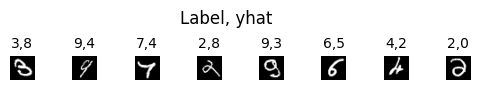

In [32]:
display_errors(model, X_test, y_test.reshape(-1,1))

# Visualise the Layers

In [27]:
layers = model.layers
W1, b1 = layers[0].get_weights()
L1 = (W1 + b1).T

images = [L1]
for i, layer in enumerate(layers[1:]):
    W, b = layer.get_weights()
    print(f'images[{i}] = {images[i].T.shape} x {W.shape}')
    L = (np.dot(images[i].T, W) + b).T
    images.append(L)

[l.shape for l in images]

images[0] = (784, 512) x (512, 256)
images[1] = (784, 256) x (256, 128)
images[2] = (784, 128) x (128, 64)
images[3] = (784, 64) x (64, 10)


[(512, 784), (256, 784), (128, 784), (64, 784), (10, 784)]

In [28]:
[(l.min(), l.max()) for l in images]

[(-0.86003304, 0.51431024),
 (-1.9718318, 2.5609183),
 (-6.721359, 5.1061916),
 (-11.758054, 10.972742),
 (-11.387803, 7.575617)]

In [29]:
# Normalize the weights
def normalise(w):
    """
    Normalise the weights to be between 0 and 255
    Inputs:
        w: weights (n, 784)
    """
    n, m = w.shape
    w = w.copy()
    for i in range(n):
        w[i] -= w[i].min()
        w[i] *= 255.0/w[i].max()
        w[i] = w[i].astype(int)
    
    return w.reshape(n, 28, 28)

images_norm = [normalise(l) for l in images]
[(l.min(), l.max()) for l in images_norm]

[(0.0, 255.0), (0.0, 255.0), (0.0, 255.0), (0.0, 255.0), (0.0, 255.0)]

n = 512, m = 28, k = 28
n = 256, m = 28, k = 28
n = 128, m = 28, k = 28
n = 64, m = 28, k = 28
n = 10, m = 28, k = 28


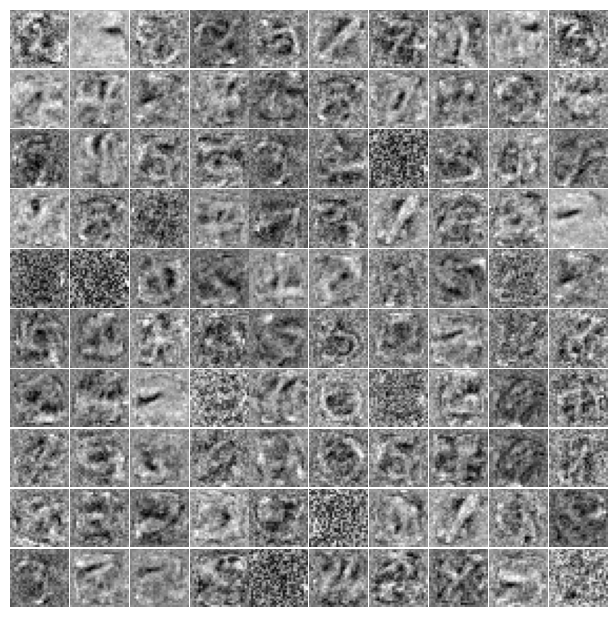

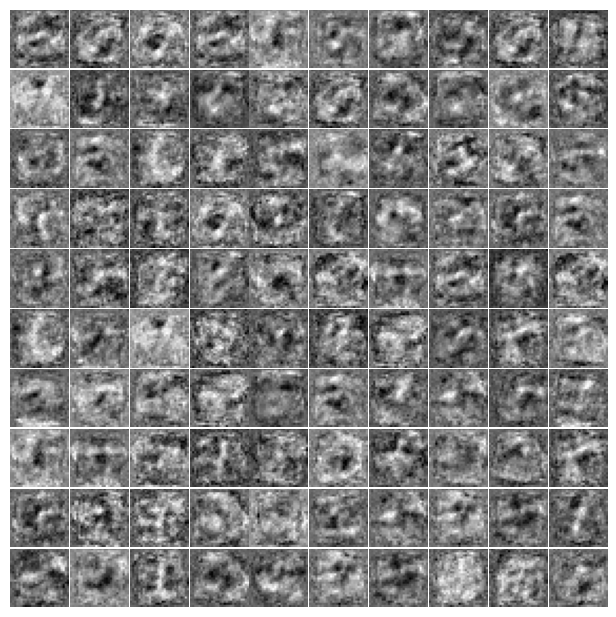

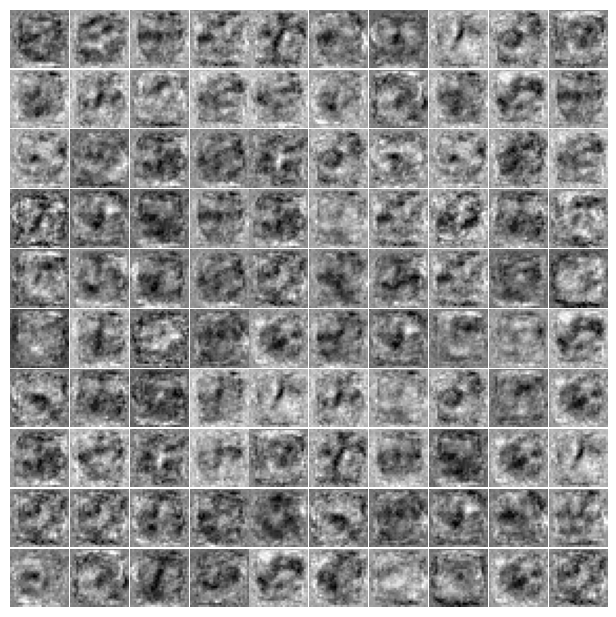

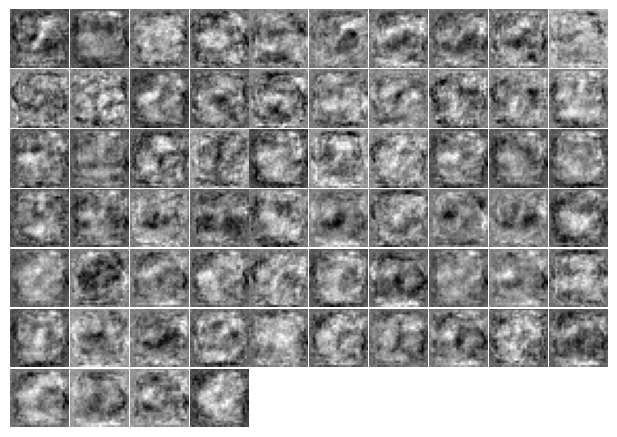

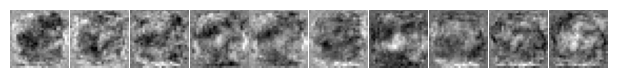

In [30]:
# Visualise the weights
x = [visualise_data(l) for l in images_norm]

n = 10, m = 28, k = 28


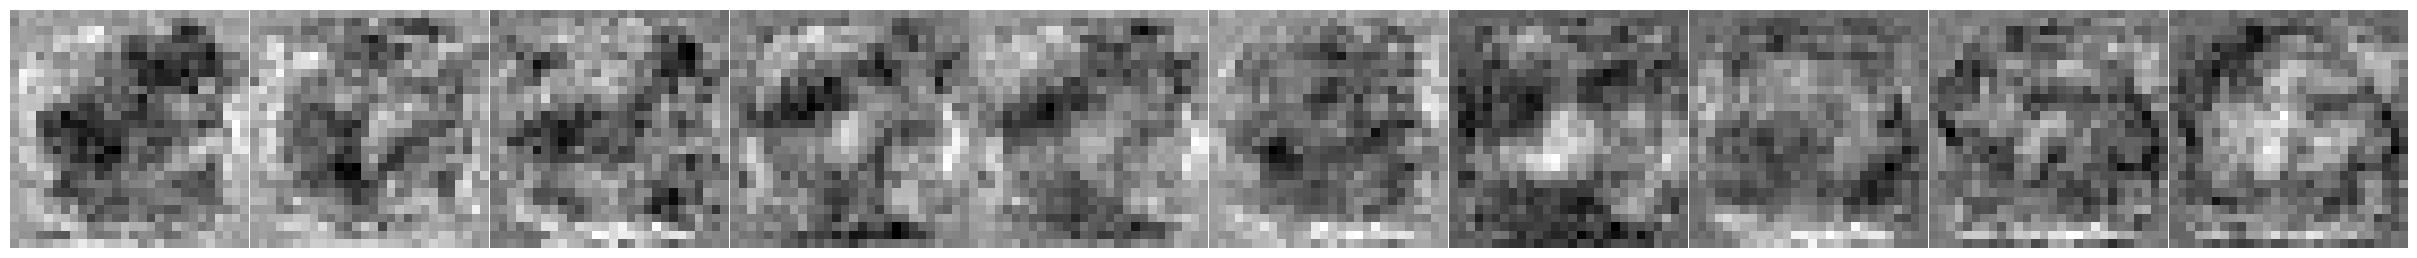

In [31]:
visualise_data(images_norm[-1], figsize=(24, 24))

# Save the model

In [60]:
model.save('data/models/mnist_model.h5')

/Users/rush/.pyenv/versions/3.9.16/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
